# Statistical learning - HW0

#  Pandas: data analysis in python

For data-intensive work in Python the [Pandas](http://pandas.pydata.org) library has become essential.

What is `pandas`?

* Pandas can be thought of as *NumPy arrays with labels* for rows and columns, and better support for heterogeneous data types, but it's also much, much more than that.
* Pandas can also be thought of as `R`'s `data.frame` in Python.
* Powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...

Documentation: http://pandas.pydata.org/pandas-docs/stable/


**When do you need pandas?**

When working with **tabular or structured data** (like R dataframe, SQL table, Excel spreadsheet, ...):

- Import data
- Clean up messy data
- Explore data, gain insight into data
- Process and prepare your data for analysis
- Analyse your data (together with scikit-learn, statsmodels, ...)

<div class="alert alert-warning">
<b>ATTENTION!</b>: <br><br>

Pandas is great for working with heterogeneous and tabular 1D/2D data, but not all types of data fit in such structures!
<ul>
<li>When working with array data (e.g. images, numerical algorithms): just stick with numpy</li>
<li>When working with multidimensional labeled data (e.g. climate data): have a look at</li>
</ul>
</div>

In [329]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 8

##  Let's start with a showcase

#### Case 1: Titanic data

In [330]:
df = pd.read_csv('titanic-train.csv')

In [331]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**What is the age distribution of the passengers?**

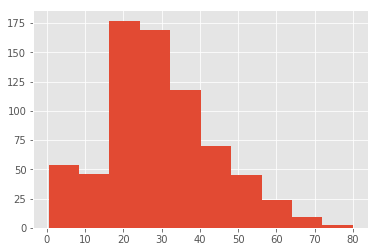

In [332]:
df['Age'].hist()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**How does the survival rate of the passengers differ between sexes?**

lambda is a short function we can use without defining it first. it can be useful with pandas operation.

In [11]:
df.groupby('Sex')[['Survived']].aggregate(lambda x: x.sum() / len(x))

,Survived
Sex,
female,0.742038
male,0.188908


**Or how does it differ between the different classes?**

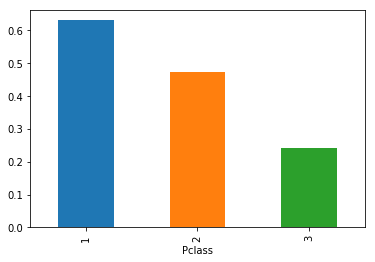

In [12]:
df.groupby('Pclass')['Survived'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

#  The pandas data structures: `DataFrame` and `Series`

A `DataFrame` is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.

In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


### Attributes of the DataFrame

A DataFrame has besides a `index` attribute, also a `columns` attribute:

In [14]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

To check the data types of the different columns:

In [16]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
                ...   
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Length: 12, dtype: object

An overview of that information can be given with the `info()` method:

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Also a DataFrame has a `values` attribute, but attention: when you have heterogeneous data, all values will be upcasted:

In [18]:
df.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

Apart from importing your data from an external source (text file, excel, database, ..), one of the most common ways of creating a dataframe is from a dictionary of arrays or lists.

Note that in the IPython notebook, the dataframe will display in a rich HTML view:

In [19]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
df_countries = pd.DataFrame(data)
df_countries

,area,capital,country,population
0,30510,Brussels,Belgium,11.3
1,671308,Paris,France,64.3
2,357050,Berlin,Germany,81.3
3,41526,Amsterdam,Netherlands,16.9
4,244820,London,United Kingdom,64.9


### One-dimensional data: `Series` (a column of a DataFrame)

A Series is a basic holder for **one-dimensional labeled data**.

In [20]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
       ... 
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [21]:
age = df['Age']

### Attributes of a Series: `index` and `values`

The Series has also an `index` and `values` attribute, but no `columns`

In [22]:
age.index

RangeIndex(start=0, stop=891, step=1)

You can access the underlying numpy array representation with the `.values` attribute:

In [23]:
age.values[:10]

array([22., 38., 26., 35., 35., nan, 54.,  2., 27., 14.])

We can access series values via the index, just like for NumPy arrays:

In [24]:
age[0]

22.0

Unlike the NumPy array, though, this index can be something other than integers:

In [25]:
df = df.set_index('Name')
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
"Behr, Mr. Karl Howell",890,1,1,male,26.0,0,0,111369,30.0000,C148,C
"Dooley, Mr. Patrick",891,0,3,male,32.0,0,0,370376,7.7500,NaN,Q


In [26]:
age = df['Age']
age

Name
Braund, Mr. Owen Harris                                22.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38.0
Heikkinen, Miss. Laina                                 26.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35.0
                                                       ... 
Graham, Miss. Margaret Edith                           19.0
Johnston, Miss. Catherine Helen "Carrie"                NaN
Behr, Mr. Karl Howell                                  26.0
Dooley, Mr. Patrick                                    32.0
Name: Age, Length: 891, dtype: float64

In [27]:
age['Dooley, Mr. Patrick']

32.0

but with the power of numpy arrays. Many things you can do with numpy arrays, can also be applied on DataFrames / Series.

Eg element-wise operations:

In [28]:
age * 1000

Name
Braund, Mr. Owen Harris                                22000.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38000.0
Heikkinen, Miss. Laina                                 26000.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35000.0
                                                        ...   
Graham, Miss. Margaret Edith                           19000.0
Johnston, Miss. Catherine Helen "Carrie"                   NaN
Behr, Mr. Karl Howell                                  26000.0
Dooley, Mr. Patrick                                    32000.0
Name: Age, Length: 891, dtype: float64

A range of methods:

In [29]:
age.mean()

29.69911764705882

Fancy indexing, like indexing with a list or boolean indexing:

In [30]:
age[age > 70]

Name
Goldschmidt, Mr. George B               71.0
Connors, Mr. Patrick                    70.5
Artagaveytia, Mr. Ramon                 71.0
Barkworth, Mr. Algernon Henry Wilson    80.0
Svensson, Mr. Johan                     74.0
Name: Age, dtype: float64

But also a lot of pandas specific methods, e.g.

In [31]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#  Data import and export

A wide range of input/output formats are natively supported by pandas:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* sas, stata
* (parquet)
* ...

Very powerful csv reader:

In [33]:
pd.read_csv?

Luckily, if we have a well formed csv file, we don't need many of those arguments:

In [34]:
df = pd.read_csv("titanic-train.csv")

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The default plot (when not specifying `kind`) is a line plot of all columns:

#  Selecting and filtering data

<div class="alert alert-warning">
<b>ATTENTION!</b>: <br><br>

One of pandas' basic features is the labeling of rows and columns, but this makes indexing also a bit more complex compared to numpy. <br><br> We now have to distuinguish between:

 <ul>
  <li>selection by **label**</li>
  <li>selection by **position**</li>
</ul>
</div>

### `df[]` provides some convenience shortcuts 

For a DataFrame, basic indexing selects the columns.

Selecting a single column:

In [36]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
       ... 
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

or multiple columns:

In [37]:
df[['Age', 'Fare']]

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
...,...,...
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000
890,32.0,7.7500


But, slicing accesses the rows:

In [38]:
df[10:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


### Systematic indexing with `loc` and `iloc`

When using `[]` like above, you can only select from one axis at once (rows or columns, not both). For more advanced indexing, you have some extra attributes:
    
* `loc`: selection by label
* `iloc`: selection by position

In [39]:
df = df.set_index('Name')

In [40]:
df.loc['Bonnell, Miss. Elizabeth', 'Fare']

26.55

In [41]:
df.loc['Bonnell, Miss. Elizabeth':'Andersson, Mr. Anders Johan', :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Bonnell, Miss. Elizabeth",12,1,1,female,58.0,0,0,113783,26.550,C103,S
"Saundercock, Mr. William Henry",13,0,3,male,20.0,0,0,A/5. 2151,8.050,NaN,S
"Andersson, Mr. Anders Johan",14,0,3,male,39.0,1,5,347082,31.275,NaN,S


Selecting by position with `iloc` works similar as indexing numpy arrays:

In [42]:
df.iloc[0:2,1:3]

,Survived,Pclass
Name,,
"Braund, Mr. Owen Harris",0,3
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1


The different indexing methods can also be used to assign data:

In [43]:
df.loc['Braund, Mr. Owen Harris', 'Survived'] = 100

In [44]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,100,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
"Behr, Mr. Karl Howell",890,1,1,male,26.0,0,0,111369,30.0000,C148,C
"Dooley, Mr. Patrick",891,0,3,male,32.0,0,0,370376,7.7500,NaN,Q


### Boolean indexing (filtering)

Often, you want to select rows based on a certain condition. This can be done with 'boolean indexing' (like a where clause in SQL) and comparable to numpy. 

The indexer (or boolean mask) should be 1-dimensional and the same length as the thing being indexed.

In [45]:
df['Fare'] > 50

Name
Braund, Mr. Owen Harris                                False
Cumings, Mrs. John Bradley (Florence Briggs Thayer)     True
Heikkinen, Miss. Laina                                 False
Futrelle, Mrs. Jacques Heath (Lily May Peel)            True
                                                       ...  
Graham, Miss. Margaret Edith                           False
Johnston, Miss. Catherine Helen "Carrie"               False
Behr, Mr. Karl Howell                                  False
Dooley, Mr. Patrick                                    False
Name: Fare, Length: 891, dtype: bool

In [46]:
df[df['Fare'] > 50]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"McCarthy, Mr. Timothy J",7,0,1,male,54.0,0,0,17463,51.8625,E46,S
"Fortune, Mr. Charles Alexander",28,0,1,male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...
"Sage, Miss. Dorothy Edith ""Dolly""",864,0,3,female,NaN,8,2,CA. 2343,69.5500,NaN,S
"Roebling, Mr. Washington Augustus II",868,0,1,male,31.0,0,0,PC 17590,50.4958,A24,S
"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",872,1,1,female,47.0,1,1,11751,52.5542,D35,S
"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",880,1,1,female,56.0,0,1,11767,83.1583,C50,C


In [47]:
df = pd.read_csv("titanic-train.csv")

#  The group-by operation

### Some 'theory': the groupby operation (split-apply-combine)

In [49]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,data,key
0,0,A
1,5,B
2,10,C
3,5,A
...,...,...
5,15,C
6,10,A
7,15,B
8,20,C


### Recap: aggregating functions

When analyzing data, you often calculate summary statistics (aggregations like the mean, max, ...). As we have seen before, we can easily calculate such a statistic for a Series or column using one of the many available methods. For example:

In [50]:
df['data'].sum()

90

However, in many cases your data has certain groups in it, and in that case, you may want to calculate this statistic for each of the groups.

For example, in the above dataframe `df`, there is a column 'key' which has three possible values: 'A', 'B' and 'C'. When we want to calculate the sum for each of those groups, we could do the following:

In [55]:
for key in ['A', 'B', 'C']:
    print(key, df[df['key'] == key]['data'].sum())
    


A 15
B 30
C 45


This becomes very verbose when having multiple groups. You could make the above a bit easier by looping over the different values, but still, it is not very convenient to work with.

What we did above, applying a function on different groups, is a "groupby operation", and pandas provides some convenient functionality for this.

### Groupby: applying functions per group

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

Similar to SQL `GROUP BY`

Instead of doing the manual filtering as above


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

pandas provides the `groupby` method to do exactly this:

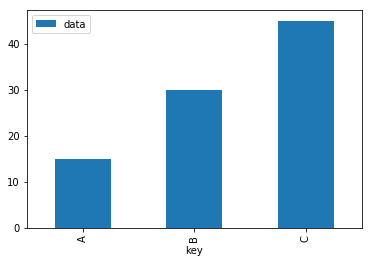

In [59]:
df.groupby('key').sum().plot(kind='bar')

In [60]:
df.groupby('key').aggregate(np.sum)  # 'sum'

,data
key,
A,15
B,30
C,45


And many more methods are available. 

In [61]:
df.groupby('key')['data'].sum()

key
A    15
B    30
C    45
Name: data, dtype: int64

# EXERCISES

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>In the Titanic dataset- What is the maximum Fare that was paid? And the median?</li>
</ul>
</div>

In [553]:
df = pd.read_csv('titanic-train.csv')
plt.style.use('ggplot')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print(df['Fare'].max())
print(df['Fare'].median())

512.3292
14.4542


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average survival ratio for all passengers without using the mean function (note: the 'Survived' column indicates whether someone survived (1) or not (0)).</li>
</ul>
</div>

In [554]:
#df['Survived'].aggregate(lambda x: x.sum() / len(x))
#or
print(df['Survived'].sum()/len(df))

0.3838383838383838


<div class="alert alert-success">

<b>EXERCISE</b>: 

 <ul>
  <li>Plot the age distribution of the titanic passengers</li>
</ul>
</div>

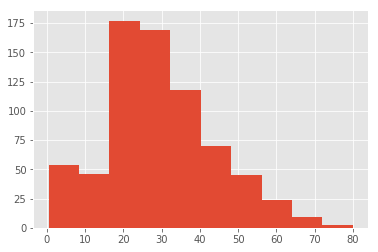

In [555]:
df['Age'].hist()

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Based on the titanic data set, select all rows for male passengers and calculate the mean age of those passengers. Do the same for the female passengers</li>
</ul>
</div>

In [556]:
print(df[df['Sex']=='male']['Age'].mean())
print(df[df['Sex']=='female']['Age'].mean())

30.72664459161148
27.915708812260537


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Based on the titanic data set, how many passengers older than 70 were on the Titanic?</li>
</ul>
</div>

In [557]:
print(len(df[df['Age']>70]))

5


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average age for each sex again, but now using groupby.</li>
</ul>
</div>

In [558]:
print(df.groupby('Sex')[['Age']].mean())

              Age
Sex              
female  27.915709
male    30.726645


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average survival ratio for all passengers.</li>
</ul>
</div>

In [559]:
print(df['Survived'].mean())

0.3838383838383838


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What is the difference in the survival ratio between the sexes?</li>
</ul>
</div>

In [560]:

# ASK ABOUT THIS Q

#df.groupby('Sex')[['Survived']].aggregate(lambda x: x.sum() / len(x))
#df[df['Sex']=='female']['Survived'].mean()/df[df['Sex']=='male']['Survived'].mean()
print(df[df['Sex']=='female']['Survived'].mean() - df[df['Sex']=='male']['Survived'].mean())

0.5531300709799203


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate this survival ratio for all male passengers younger that 25 that belongs to Pclass 1.</li>
</ul>
</div>

In [561]:
print(df[(df['Sex']=='male') & (df['Age']<25) & (df['Pclass']==1)]['Survived'].mean())

0.4166666666666667


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Or how does it differ between the different classes? Make a bar plot visualizing the survival ratio for the 3 Pclass classes.</li>
</ul>
</div>

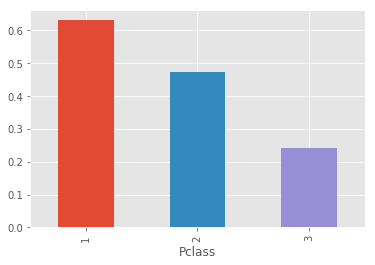

In [562]:
#df.groupby('Pclass')['Survived'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Make a bar plot to visualize the average Fare payed by people depending on their age.use `pd.cut` to divide the age column.</li>
</ul>
</div>

[Text(0,0.5,'Average Fare'), Text(0.5,0,'Age categories')]

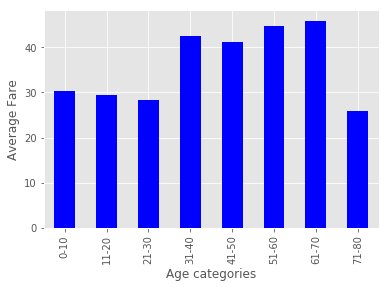

In [563]:
binedges = np.arange(0,df.Age.max()+10,10)
binlabels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80']

df['age_bins'] = pd.cut(df.Age,bins=binedges ,labels=binlabels)
ax = df.groupby('age_bins')['Fare'].mean().plot(kind='bar',color='b')
ax.set(xlabel='Age categories', ylabel='Average Fare')

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Add another column to the dataframe and call it 'Rank'. the vaules of this column will be the rank of the 'Fare' according to the 'Pclass' column. e.g if one had the maximal Fare in Pclass 1 he gets 1 (same for the maximal of Pclass 2) and so on </li>
</ul>
</div>

In [564]:
df['Rank'] = df.groupby('Pclass')['Fare'].rank(ascending=False)

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Look at the Cabin columns and turn it into another boolean column (1/0) indicates if the passenger has a cabin or not </li>
</ul>
</div>

In [565]:
df['Cabin_bool'] = df['Cabin'].notnull()

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Let's look at the names of the passengers. You need to create column 'Title' by extracting the title of the passenger with 5 possible values: Mrs, Mr, Miss , Master and other, when other refers to rest of the titles.   </li>
    <li> Hint : you can use `Regex` for the extracting step
</ul>
</div>

In [566]:
import re

regex = '(?:$|^| )(Mrs|Mr|Miss|Master|Mrs.|Mr.|Miss.|Master.|mrs|mr|miss|master|mrs.|mr.|miss.|master.)(?:$|^| )'

name_list = df['Name'].tolist()
title = []
for name in name_list:
    t=re.findall(regex, name)
    if not t:
        title.append('other')
        continue
    for ch in t:
        new_t = ch.replace('.', '')
        title.append(new_t)
df['Title'] = title

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>fill the Null values of the Age colum with considerable value and divide the Age and the Fare columns to 3 bins. Finally, drop the original columns  </li>
</ul>
</div>

In [567]:
#fill the null values of the Age column with considerable(?) value
df.Age.replace(np.NaN, 0, inplace=True) #NOT CLEAR WHAT IS A CONSIDERABLE VALUE

#divide the age and fare columns to 3 bins
#age
binedges = np.linspace(df.Age.min(), df.Age.max(), 4)
binlabels = [str(binedges[0])+'-'+str(round(binedges[1])),str(round(binedges[1]))+'-'+str(round(binedges[2])),str(round(binedges[2]))+'-'+str(round(binedges[3]))]
df['age_3_bins'] = pd.cut(df.Age,bins=binedges ,labels=binlabels)
#fare
binedges = np.linspace(df.Fare.min(), df.Fare.max(), 4)
binlabels = [str(binedges[0])+'-'+str(round(binedges[1])),str(round(binedges[1]))+'-'+str(round(binedges[2])),str(round(binedges[2]))+'-'+str(round(binedges[3]))]
df['fare_3_bins'] = pd.cut(df.Fare,bins=binedges ,labels=binlabels)

#drop the original columns
df.drop('Age', axis=1, inplace=True)
df.drop('Fare', axis=1, inplace=True)

# Now let's create our own dataset

<div class="alert alert-success">

<b>EXERCISE</b>:

 
    Genrate a DataFrame with the following: 
 <ul>   <li>   200 rows, 5 columns - the first one must be generated out of this list : cat,dog,horse,pig,None (the python equivallent to Null in C++) and with uniform distribution.The rest of the columns need to be generated out of standard normal distribution 
    The columns names are : key,A,B,C,D</li>
</ul>
</div>

In [568]:
# create an empty df with column names: key, A, B, C, D
col_names =  ['key','A', 'B', 'C','D']
numRows = 200
df = pd.DataFrame(index=range(numRows),columns=col_names)

# fill the first column with - cat, dog, horse, pig, None with uniform distribution. 
animals = ['cat', 'dog', 'horse', 'pig',None]
df['key'] = np.random.choice(animals, numRows)

# fill the rest of the columns out of standard normal distribution. 
for i in range(1,5): 
     df[col_names[i]] = np.random.standard_normal(numRows)

<div class="alert alert-success">

<b>EXERCISE</b>:

Now that we have some null values we need to fill them. replace it with the last valid value of the sorted Dataframe according to column C (ascending). Finally reset the index
</div>

In [569]:
# replace the None values with the last valid value (in column key?) of the sorted df according to column C
df = df.sort_values('C', ascending=True)

rep_animal = None
while rep_animal is None:
    rep_animal = df.loc[df['C'] == df['C'].max(), 'key'].iloc[0]

# df['key'].replace(None, rep_animal, inplace=True)
df['key'].fillna(value=rep_animal, inplace=True)

# reset the index 
# df.reset_index(drop=True)
df.reset_index()

,index,key,A,B,C,D
0,3,pig,1.232128,-0.315534,-2.314247,-1.073575
1,130,dog,0.408602,0.150002,-2.282880,0.968607
2,86,dog,0.043166,0.225721,-2.242299,-0.660823
3,185,dog,-0.581559,0.738879,-2.184273,1.336626
...,...,...,...,...,...,...
196,32,pig,-0.717012,0.126499,2.148507,0.471112
197,146,dog,1.340235,-0.859945,2.356775,0.408570
198,106,dog,-0.770709,-2.318966,2.695508,-2.826732
199,21,horse,-0.725280,1.414844,3.198812,-0.093785


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
    <li> Extract for each value in the 'key' column the row with the minimal value in 'A' column and return the 'D' column value of the row.
        </li><li>Do it again, this time to the minimal of columns 'B' AND 'C'.</li><li> Finally, concatenate it all to new DataFrame (df2) with the following columns: 'key','A_MINIMAL','B_MINIMAL','C_MINIMAL' (you should have totally 4 rows, one for each key)</li> </ul>
</div>

In [627]:
# for each column in 'key' extract the row+D-column with minimal value in A
a = df.loc[df.groupby('key')['A'].idxmin(),['key','D']]

# with minimal value in B
b = df.loc[df.groupby('key')['B'].idxmin(),['key','D']]

# with minimal value in C
c = df.loc[df.groupby('key')['C'].idxmin(),['key','D']]

# new df2 (concatinate all)
col_names =  ['key','A_MINIMAL', 'B_MINIMAL', 'C_MINIMAL']
numRows = 4
df2 = pd.DataFrame(columns=col_names)
df2['key'] = a.key.values
df2['A_MINIMAL'] = a.D.values
df2['B_MINIMAL'] = b.D.values
df2['C_MINIMAL'] = c.D.values

print(df2)

     key  A_MINIMAL  B_MINIMAL  C_MINIMAL
0    cat  -1.396084  -0.805351  -1.495014
1    dog  -1.773175  -2.826732   0.968607
2  horse   0.681624   0.815851   0.959631
3    pig  -0.857030  -1.077159  -1.073575
